In [99]:

###XGBoost Model 128###


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread, imshow
import cv2
import os, os.path

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output

In [2]:
#set train and test directories for desktop local C drive------------------------

#local directory parent folder containing the training folders: type_1, type_2, type_3 and test files

dir_loc = 'C:\\Users\\Jason\\Desktop\\Cervix'
dir_loc_sub = '\\XGBoost128x128'

#local directory parent folder containing the training folders: type_1, type_2, type_3
tr1_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_1'
tr2_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_2'
tr3_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_3'

#local directory parent folder containing the test files
tst1_dir_loc = dir_loc + dir_loc_sub + '\\test'


#files for each training type (1,2,3)
tr1_f_loc = [os.path.join(tr1_dir_loc, f) for f in os.listdir(tr1_dir_loc)]
tr2_f_loc = [os.path.join(tr2_dir_loc, f) for f in os.listdir(tr2_dir_loc)]
tr3_f_loc = [os.path.join(tr3_dir_loc, f) for f in os.listdir(tr3_dir_loc)]

#test image directory
tst1_f_loc = [os.path.join(tst1_dir_loc, f) for f in os.listdir(tst1_dir_loc)]

In [3]:
#remove corrupt exif data for local files

import piexif


for f in tr1_f_loc:
    piexif.remove(f)

for f in tr2_f_loc:
    piexif.remove(f)
    
for f in tr3_f_loc:
    piexif.remove(f)
    
for f in tst1_f_loc:
    piexif.remove(f)
    
##this operations was already performed on files saved locally so 
##it is blocked off here 

In [4]:
#resize type1 files (note: these were already resized once with NN model)

from PIL import Image, ImageFile
import os, sys

# this operations to resize files was alreay performed and saved locally
# so doesn't need to be run again

ImageFile.LOAD_TRUNCATED_IMAGES = True

path1 = tr1_dir_loc + "\\"
dirs = os.listdir( path1 )
final_size = 128;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path1+item):
            im = Image.open(path1+item)
            f, e = os.path.splitext(path1+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=90)
resize_aspect_fit()

In [5]:
#resize type2 files  (note: these were already resized once with NN model)

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path2 = tr2_dir_loc + "\\"
dirs = os.listdir( path2 )
final_size = 128;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path2+item):
            im = Image.open(path2+item)
            f, e = os.path.splitext(path2+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=90)
resize_aspect_fit()

In [6]:
#resize type3 files (note: these were already resized once with NN model)

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path3 = tr3_dir_loc + "\\"
dirs = os.listdir( path3 )
final_size = 128;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path3+item):
            im = Image.open(path3+item)
            f, e = os.path.splitext(path3+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=90)
resize_aspect_fit()

In [7]:
#resize test files (note: these were already resized once with NN model)

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path4 = tst1_dir_loc + "\\"
dirs = os.listdir( path4 )
final_size = 128;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path4+item):
            im = Image.open(path4+item)
            f, e = os.path.splitext(path4+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=90)
resize_aspect_fit()

(4160, 3120, 3)


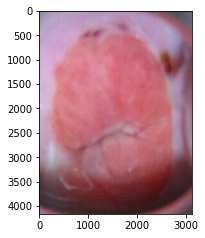

In [8]:
#compare original image with scaled and cropped image

import imageio

testImage = imageio.imread("C:\\Users\\Jason\\Desktop\\Cervix backup files\\train\\Type_1\\2.jpg")

testImageGray = testImage[:,:,0]

plt.figure()
plt.gray()

plt.subplot(121)
plt.imshow(testImage)

print(testImage.shape)

(128, 128, 3)


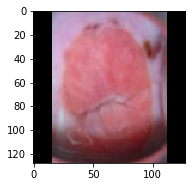

In [11]:
#cropped and re-sized image
testImage1 = imageio.imread("C:\\Users\\Jason\\Desktop\\Cervix\\XGBoost128x128\\train\\Type_1\\2.jpg")

plt.figure()

plt.subplot(121)
plt.imshow(testImage1)

print(testImage1.shape)

(128, 128)


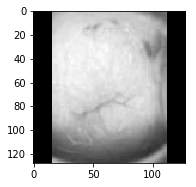

In [12]:
#cropped and resized grey image
testImageGray1 = testImage1[:,:,0]

plt.subplot(121)
plt.imshow(testImageGray1)

print (testImageGray1.shape)

In [13]:
#######################################################
#
#
#      Read Images into Python 
#
#
#######################################################
from subprocess import check_output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

from time import time
from time import sleep

import pandas as pd
import scipy.misc

import matplotlib.pyplot as plt 

In [14]:
#re-set the files because they have been resized
#files for each training type (1,2,3)
tr1_f_loc = [os.path.join(tr1_dir_loc, f) for f in os.listdir(tr1_dir_loc)]
tr2_f_loc = [os.path.join(tr2_dir_loc, f) for f in os.listdir(tr2_dir_loc)]
tr3_f_loc = [os.path.join(tr3_dir_loc, f) for f in os.listdir(tr3_dir_loc)]

#test image directory
tst1_f_loc = [os.path.join(tst1_dir_loc, f) for f in os.listdir(tst1_dir_loc)]

In [15]:
#get path for all files in the local C: Type1 folder, then split to see file type and cervix type

#tr1_f_loc = [os.path.join(tr_t1, f) for f in os.listdir(tr_t1)]
tr1_im_loc = pd.DataFrame({"imagepath": tr1_f_loc})
tr1_im_loc["filetype"] = tr1_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr1_im_loc["type"] = tr1_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr1_im_loc["name"] = tr1_im_loc.apply(lambda row: row.imagepath.split("\\")[8], axis=1)
tr1_im_loc.head()

# a=imageio.imread('C:\\Users\\Jason\\Desktop\\Cervix\\XGBoost64x64\\train\\Type_1\\2.jpg')
# plt.imshow(a)

,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_1,10.jpg
1,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_1,1013.jpg
2,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_1,1014.jpg
3,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_1,1019.jpg
4,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_1,102.jpg


In [16]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_1\\1013resCroppedres.jpg')
# plt.imshow(a)

#create ylab1

y1 = tr1_im_loc['type']
len(y1)

751

In [17]:
#get path for all files in the local C: Type2 folder, then split to see file type and cervix type

tr2_im_loc = pd.DataFrame({"imagepath": tr2_f_loc})
tr2_im_loc["filetype"] = tr2_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr2_im_loc["type"] = tr2_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr2_im_loc["name"] = tr2_im_loc.apply(lambda row: row.imagepath.split("\\")[8], axis=1)
tr2_im_loc.head()


,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_2,1.jpg
1,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_2,100.jpg
2,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_2,1001.jpg
3,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_2,1002.jpg
4,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_2,1005.jpg


In [18]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_2\\1001resCroppedres.jpg')
# plt.imshow(a)

#create ylab2

y2 = tr2_im_loc['type']
len(y2)

761

In [19]:
#get path for all files in the local C: Type3 folder, then split to see file type and cervix type

tr3_im_loc = pd.DataFrame({"imagepath": tr3_f_loc})
tr3_im_loc["filetype"] = tr3_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr3_im_loc["type"] = tr3_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr3_im_loc["name"] = tr3_im_loc.apply(lambda row: row.imagepath.split("\\")[8], axis=1)
tr3_im_loc.head()


,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,100.jpg
1,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,1000.jpg
2,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,1003.jpg
3,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,1004.jpg
4,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,1007.jpg


In [20]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_3\\1000resCroppedres.jpg')
# plt.imshow(a)

#create ylab3

y3 = tr3_im_loc['type']
len(y3)

776

In [21]:
#get path for all files in the local C: Test folder, then split to see file type and cervix type

tst1_im_loc = pd.DataFrame({"imagepath": tst1_f_loc})
tst1_im_loc["filetype"] = tst1_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tst1_im_loc["type"] = tst1_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tst1_im_loc["name"] = tst1_im_loc.apply(lambda row: row.imagepath.split("\\")[7], axis=1)
tst1_im_loc.head()


,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,test,0.jpg
1,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,test,1.jpg
2,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,test,10.jpg
3,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,test,100.jpg
4,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,test,101.jpg


In [22]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\test\\0resCroppedres.jpg')
# plt.imshow(a)

#get the name of the images for testing
tst_name = tst1_im_loc['name']
len(tst_name), len(tst1_im_loc), tst_name[0:2]

(512, 512, 0    0.jpg
 1    1.jpg
 Name: name, dtype: object)

In [23]:
#combine all data frames together

tr_all_loc = tr1_im_loc.append(tr2_im_loc)
tr_all_loc = tr_all_loc.append(tr3_im_loc)

tr_all_loc = tr_all_loc.reset_index(drop=True)

tr_all_loc.tail()

,imagepath,filetype,type,name
2283,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,986.jpg
2284,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,992.jpg
2285,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,993.jpg
2286,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,995.jpg
2287,C:\Users\Jason\Desktop\Cervix\XGBoost128x128\t...,jpg,Type_3,996.jpg


In [24]:
#check to make sure all files appended from each folder
len(tr_all_loc), len(tr1_im_loc) + len(tr2_im_loc) + len(tr3_im_loc)

(2288, 2288)

In [25]:
#combine all ylabels together
type_all = y1.append(y2)
type_all = type_all.append(y3)
type_all = type_all.reset_index(drop=True)
len(type_all), type_all.head(), type_all.tail()

(2288, 0    Type_1
 1    Type_1
 2    Type_1
 3    Type_1
 4    Type_1
 Name: type, dtype: object, 2283    Type_3
 2284    Type_3
 2285    Type_3
 2286    Type_3
 2287    Type_3
 Name: type, dtype: object)

In [26]:
import cv2

arr_images_gr = []        

for image in tr_all_loc["imagepath"]:
    arr_images_gr.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))

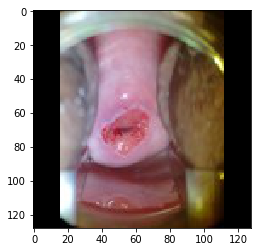

In [27]:
a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\XGBoost128x128\\train\\Type_1\\1013.jpg')
plt.imshow(a)



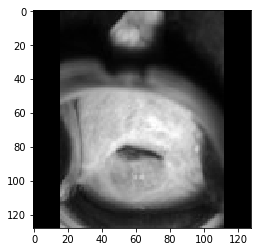

In [28]:
plt.imshow(arr_images_gr[0])

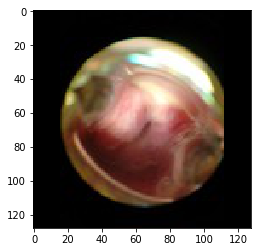

In [29]:
a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\XGBoost128x128\\train\\Type_3\\996.jpg')
plt.imshow(a)


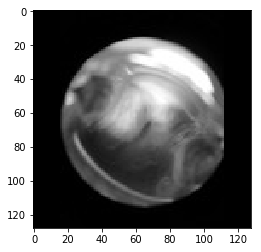

In [30]:
plt.imshow(arr_images_gr[2287])

In [31]:
#convert all test images in the combined data frame to gray scale npy array

arr_images_tst_gr = []        

for image in tst1_im_loc["imagepath"]:
    arr_images_tst_gr.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))

In [32]:
#save the training files and the y variable to numpy arrays

import numpy as np

np.save("Reduced_array_file_gray_128", arr_images_gr)
np.save("Reduced_y_train_types_128", type_all)

#save the testfile to numpy arrays

np.save("Reduced_array_file_tst_gray_128", arr_images_tst_gr)
np.save("Reduced_test_filenames_128", tst_name)


In [ ]:
########################################################################
#
#
#          XGBoost
#
#
########################################################################

In [33]:
import xgboost as xgb

In [34]:
#load gray npy array
tr_im_in = np.load('Reduced_array_file_gray_128.npy')
tr_lab_in = np.load('Reduced_y_train_types_128.npy')

tst_im_in = np.load('Reduced_array_file_tst_gray_128.npy')
tst_image_name = np.load('Reduced_test_filenames_128.npy')


len(tr_im_in), tr_im_in.shape, len(tr_lab_in), tr_lab_in.shape, len(tst_im_in), len(tst_image_name)

(2288, (2288, 128, 128), 2288, (2288,), 512, 512)

In [83]:
#y_lab = tr_lab_in.replace(["Type_1", "Type_2", "Type_3"], [0,1,2]).astype('category')

In [35]:
tr_im_in_rshape = tr_im_in.reshape(2288, 16384)
tst_im_in_rshape = tst_im_in.reshape(512, 16384)

tr_im_in_rshape.shape, tst_im_in_rshape.shape

((2288, 16384), (512, 16384))

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(tr_im_in_rshape, tr_lab_in, test_size = 0.3, random_state=123)

In [38]:
y_train[0:4]

array(['Type_1', 'Type_3', 'Type_1', 'Type_1'], dtype=object)

In [39]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [40]:
xgb_model_3e = XGBClassifier()
print(xgb_model_3e.get_xgb_params())

{'objective': 'binary:logistic', 'reg_alpha': 0, 'learning_rate': 0.1, 'scale_pos_weight': 1, 'nthread': 1, 'missing': None, 'seed': 0, 'silent': 1, 'booster': 'gbtree', 'base_score': 0.5, 'subsample': 1, 'min_child_weight': 1, 'max_delta_step': 0, 'colsample_bytree': 1, 'gamma': 0, 'max_depth': 3, 'n_estimators': 100, 'colsample_bylevel': 1, 'reg_lambda': 1}


In [128]:
#########     Model 3 using error as metric        #########

In [41]:
# Train and evaluate.
xgb_model_3e.fit(X_train, y_train, eval_metric=['merror'], eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-merror:0.44035	validation_1-merror:0.56623
[1]	validation_0-merror:0.430356	validation_1-merror:0.560408
[2]	validation_0-merror:0.418488	validation_1-merror:0.54294
[3]	validation_0-merror:0.39975	validation_1-merror:0.545852
[4]	validation_0-merror:0.392255	validation_1-merror:0.547307
[5]	validation_0-merror:0.37664	validation_1-merror:0.537118
[6]	validation_0-merror:0.364772	validation_1-merror:0.540029
[7]	validation_0-merror:0.354154	validation_1-merror:0.537118
[8]	validation_0-merror:0.343535	validation_1-merror:0.540029
[9]	validation_0-merror:0.329794	validation_1-merror:0.531295
[10]	validation_0-merror:0.324172	validation_1-merror:0.548763
[11]	validation_0-merror:0.314179	validation_1-merror:0.545852
[12]	validation_0-merror:0.30356	validation_1-merror:0.544396
[13]	validation_0-merror:0.296065	validation_1-merror:0.548763
[14]	validation_0-merror:0.286071	validation_1-merror:0.556041
[15]	validation_0-merror:0.28857	validation_1-merror:0.550218
[16]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Text(0.5,0,'Number of iterations')

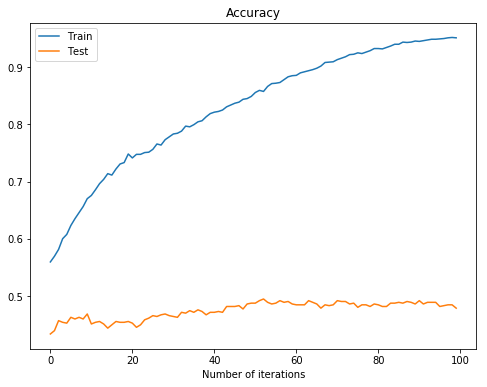

In [43]:
from matplotlib import pyplot

xgb_eval_3e = xgb_model_3e.evals_result()
eval_steps_3e = range(len(xgb_eval_3e['validation_0']['merror']))

fig, ax = pyplot.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps_3e, [1-x for x in xgb_eval_3e['validation_0']['merror']], label='Train')
ax.plot(eval_steps_3e, [1-x for x in xgb_eval_3e['validation_1']['merror']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations')

In [44]:
# Select trained model.
n_trees = 52
y_pred_3e = xgb_model_3e.predict_proba(X_test, ntree_limit= n_trees)

In [45]:
y_pred_3e[0:10]

array([[0.2828163 , 0.45104185, 0.26614186],
       [0.69480306, 0.15445118, 0.15074575],
       [0.11062803, 0.25939628, 0.6299757 ],
       [0.15355347, 0.2796636 , 0.56678295],
       [0.40245053, 0.21605434, 0.38149515],
       [0.20740567, 0.2945039 , 0.49809045],
       [0.11499465, 0.26583922, 0.61916614],
       [0.5533619 , 0.12753846, 0.31909966],
       [0.4056837 , 0.34017804, 0.25413826],
       [0.380692  , 0.3226463 , 0.29666165]], dtype=float32)

In [81]:
# accuracy = accuracy_score(y_test, y_pred_1e)
# print("Accuracy: %.1f%%" % (accuracy * 100.0))

In [46]:
#run test data through model using optimal number of trees
# tst_im_in_rshape

n_trees = 52
y_pred_3e_tst = xgb_model_3e.predict_proba(tst_im_in_rshape, ntree_limit= n_trees)

In [47]:
y_pred_3e_tst[0:10]

array([[0.18488884, 0.40100154, 0.4141096 ],
       [0.17088519, 0.3193321 , 0.50978273],
       [0.605237  , 0.23726177, 0.15750122],
       [0.21712643, 0.45102352, 0.33185   ],
       [0.3318674 , 0.26008865, 0.40804398],
       [0.30263323, 0.35035843, 0.34700835],
       [0.15853988, 0.29083994, 0.5506202 ],
       [0.3382509 , 0.3042332 , 0.35751593],
       [0.31242195, 0.4432161 , 0.24436195],
       [0.13884097, 0.33819702, 0.52296203]], dtype=float32)

In [48]:
#xgboost_best = pd.DataFrame({'label': tr_lab_in, 'images': list(tr_im_in)}, columns=['label', 'images'])

xgboost_best_128 = pd.DataFrame(list(y_pred_3e_tst), columns=["Type_1", "Type_2", "Type_3"])
xgboost_best_128 = xgboost_best_128.reset_index(drop=True)

#xgboost_best = pd.DataFrame(tst_image_name, xgboost_best)
xgboost_best_128[0:10]

,Type_1,Type_2,Type_3
0,0.184889,0.401002,0.414110
1,0.170885,0.319332,0.509783
2,0.605237,0.237262,0.157501
3,0.217126,0.451024,0.331850
4,0.331867,0.260089,0.408044
5,0.302633,0.350358,0.347008
6,0.158540,0.290840,0.550620
7,0.338251,0.304233,0.357516
8,0.312422,0.443216,0.244362
9,0.138841,0.338197,0.522962


In [49]:
tst_image_name[0:10]

array(['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg',
       '103.jpg', '104.jpg', '105.jpg', '106.jpg'], dtype=object)

In [50]:
tst_image_df_3 =pd.DataFrame({'image_name': tst_image_name})
#tst_image_df[0:10]

In [51]:
xg_best_df_3 = pd.concat([tst_image_df_3, xgboost_best_128], axis=1)
xg_best_df_3[0:10]

,image_name,Type_1,Type_2,Type_3
0,0.jpg,0.184889,0.401002,0.414110
1,1.jpg,0.170885,0.319332,0.509783
2,10.jpg,0.605237,0.237262,0.157501
3,100.jpg,0.217126,0.451024,0.331850
4,101.jpg,0.331867,0.260089,0.408044
5,102.jpg,0.302633,0.350358,0.347008
6,103.jpg,0.158540,0.290840,0.550620
7,104.jpg,0.338251,0.304233,0.357516
8,105.jpg,0.312422,0.443216,0.244362
9,106.jpg,0.138841,0.338197,0.522962


In [52]:
xg_best_df_3.to_csv('xg_128_best_out.csv', index=False)

In [ ]:
#########     Model 3 using logloss as metric        #########

#not run because less accurate than 64 bit version

In [53]:
# Train and evaluate.

# xgb_model_3l = XGBClassifier()

# xgb_model_3l.fit(X_train, y_train, eval_metric=['mlogloss'], eval_set=[((X_train, y_train)),(X_test, y_test)])

Text(0.5,0,'Number of iterations')

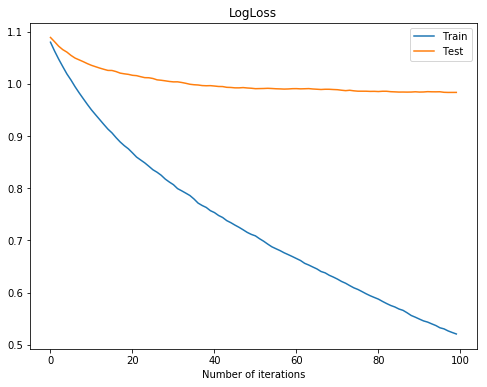

In [165]:
# xgb_eval_3l = xgb_model_3l.evals_result()
# eval_steps_3l = range(len(xgb_eval_3l['validation_0']['mlogloss']))

# fig, ax = pyplot.subplots(1, 1, sharex=True, figsize=(8, 6))

# ax.plot(eval_steps_3l, [x for x in xgb_eval_3l['validation_0']['mlogloss']], label='Train')
# ax.plot(eval_steps_3l, [x for x in xgb_eval_3l['validation_1']['mlogloss']], label='Test')
# ax.legend()
# ax.set_title('LogLoss')
# ax.set_xlabel('Number of iterations')

In [166]:
# # Select trained model.
# n_trees = 97
# y_pred_3l = xgb_model_3l.predict_proba(X_test, ntree_limit= n_trees)


In [167]:
# y_pred_3l[0:10]

array([[0.20602359, 0.4318021 , 0.3621743 ],
       [0.64309347, 0.14231452, 0.21459202],
       [0.07207223, 0.34616938, 0.5817583 ],
       [0.12676391, 0.24696985, 0.62626624],
       [0.45309168, 0.2457423 , 0.30116606],
       [0.15810008, 0.24676856, 0.59513134],
       [0.08638909, 0.31548005, 0.5981308 ],
       [0.55334944, 0.10883714, 0.33781338],
       [0.3173042 , 0.44997072, 0.23272507],
       [0.6143053 , 0.2400117 , 0.14568299]], dtype=float32)

In [ ]:
#########     Model 4 using grid       #########

In [54]:
# Create XGBoost pipeline, set up parameter grid.
xgb_model_4gs = XGBClassifier()
parameters = {'reg_alpha': [0.0, 1.0], 'reg_lambda': [0.0, 1.0], 'n_estimators': [n_trees], 'seed': [123]}

In [55]:
# Search for the best parameters.
clf4 = GridSearchCV(xgb_model_4gs, parameters, scoring='accuracy', cv=10, verbose=1, n_jobs=-1, refit=True)
clf4.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 18.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'reg_alpha': [0.0, 1.0], 'seed': [123], 'reg_lambda': [0.0, 1.0], 'n_estimators': [52]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [56]:
# View the performance result.
clf4.grid_scores_

C:\Users\Jason\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



[mean: 0.48907, std: 0.04482, params: {'reg_alpha': 0.0, 'seed': 123, 'reg_lambda': 0.0, 'n_estimators': 52},
 mean: 0.49656, std: 0.03995, params: {'reg_alpha': 0.0, 'seed': 123, 'reg_lambda': 1.0, 'n_estimators': 52},
 mean: 0.49844, std: 0.04511, params: {'reg_alpha': 1.0, 'seed': 123, 'reg_lambda': 0.0, 'n_estimators': 52},
 mean: 0.49157, std: 0.03565, params: {'reg_alpha': 1.0, 'seed': 123, 'reg_lambda': 1.0, 'n_estimators': 52}]

In [57]:
print("Best score: %.1f%%" % (clf4.best_score_*100))
print("Best parameter set: %s" % (clf4.best_params_))

Best score: 49.8%
Best parameter set: {'reg_alpha': 1.0, 'seed': 123, 'reg_lambda': 0.0, 'n_estimators': 52}


In [59]:
y_pred_grid4 = clf4.best_estimator_.predict(X_test, ntree_limit= n_trees)

accuracy4 = accuracy_score(y_test, y_pred_grid4)
print("Accuracy: %.1f%%" % (accuracy4 * 100.0))

Accuracy: 47.7%


C:\Users\Jason\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

